In [33]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


In [34]:
df = pd.read_csv('C:\\Users\\FloMartin-ResolveMin\\Desktop\\git\\EDA-using-Python\\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [36]:
# drop null values 

threshold = 0.3 #threshold for the minimum non-null values 

df2 = df.dropna(axis=1, thresh=int(threshold*len(df))) #dropna() method to remove columns where the number of non-null values is below the specified threshold.
df2 = df2.drop(columns=['Id'], errors = 'ignore') #use drop to explicitly remove the 'Id' column if it exists.

dropped_columns = set(df.columns)-set(df2.columns) ## List dropped columns
print("List of dropped columns:", ", ".join(dropped_columns))
print('\n')

df = df2

List of dropped columns: PoolQC, Id, MiscFeature, Alley, Fence




count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\FloMartin-ResolveMin\AppData\Local\Temp\ipykernel_24832\419029210.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df["SalePrice"], color='g', bins=100, hist_kws={'alpha':0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

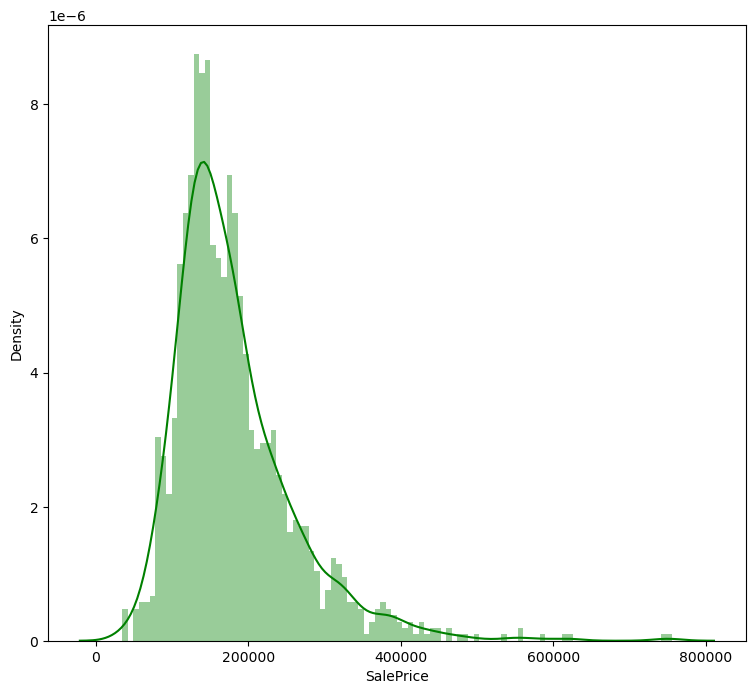

In [37]:
# visualize the distribution and characteristics of the 'SalePrice' variable in the dataset

print(df['SalePrice'].describe())
plt.figure(figsize=(9,8))
sn.distplot(df["SalePrice"], color='g', bins=100, hist_kws={'alpha':0.4})


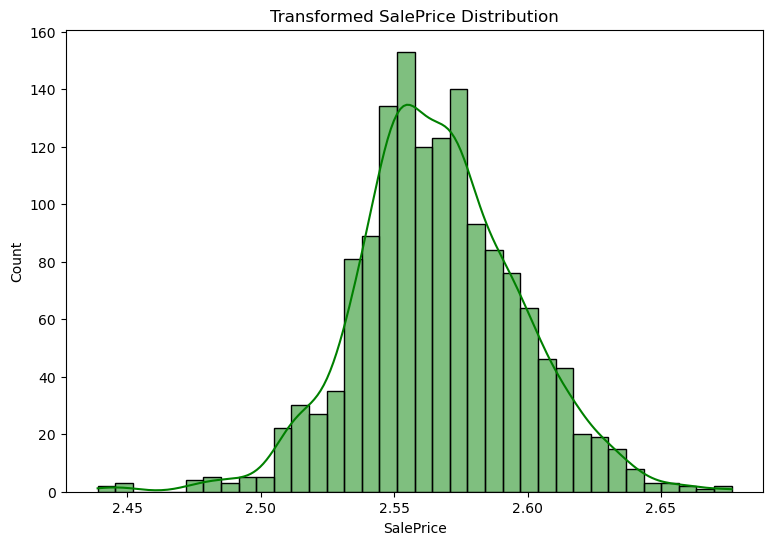

In [39]:
# logarithmic transformation

df['SalePrice'] = np.log1p(df['SalePrice'])

plt.figure(figsize=(9, 6))
sn.histplot(df['SalePrice'], kde=True, color='g')
plt.title('Transformed SalePrice Distribution')
plt.show()


In [40]:
# Numerical data distribution, all features by taking only the numerical values in the dataset

list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [41]:
df_num = df.select_dtypes(include= ['float64', 'int64'])
df_num.head

<bound method NDFrame.head of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  M

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

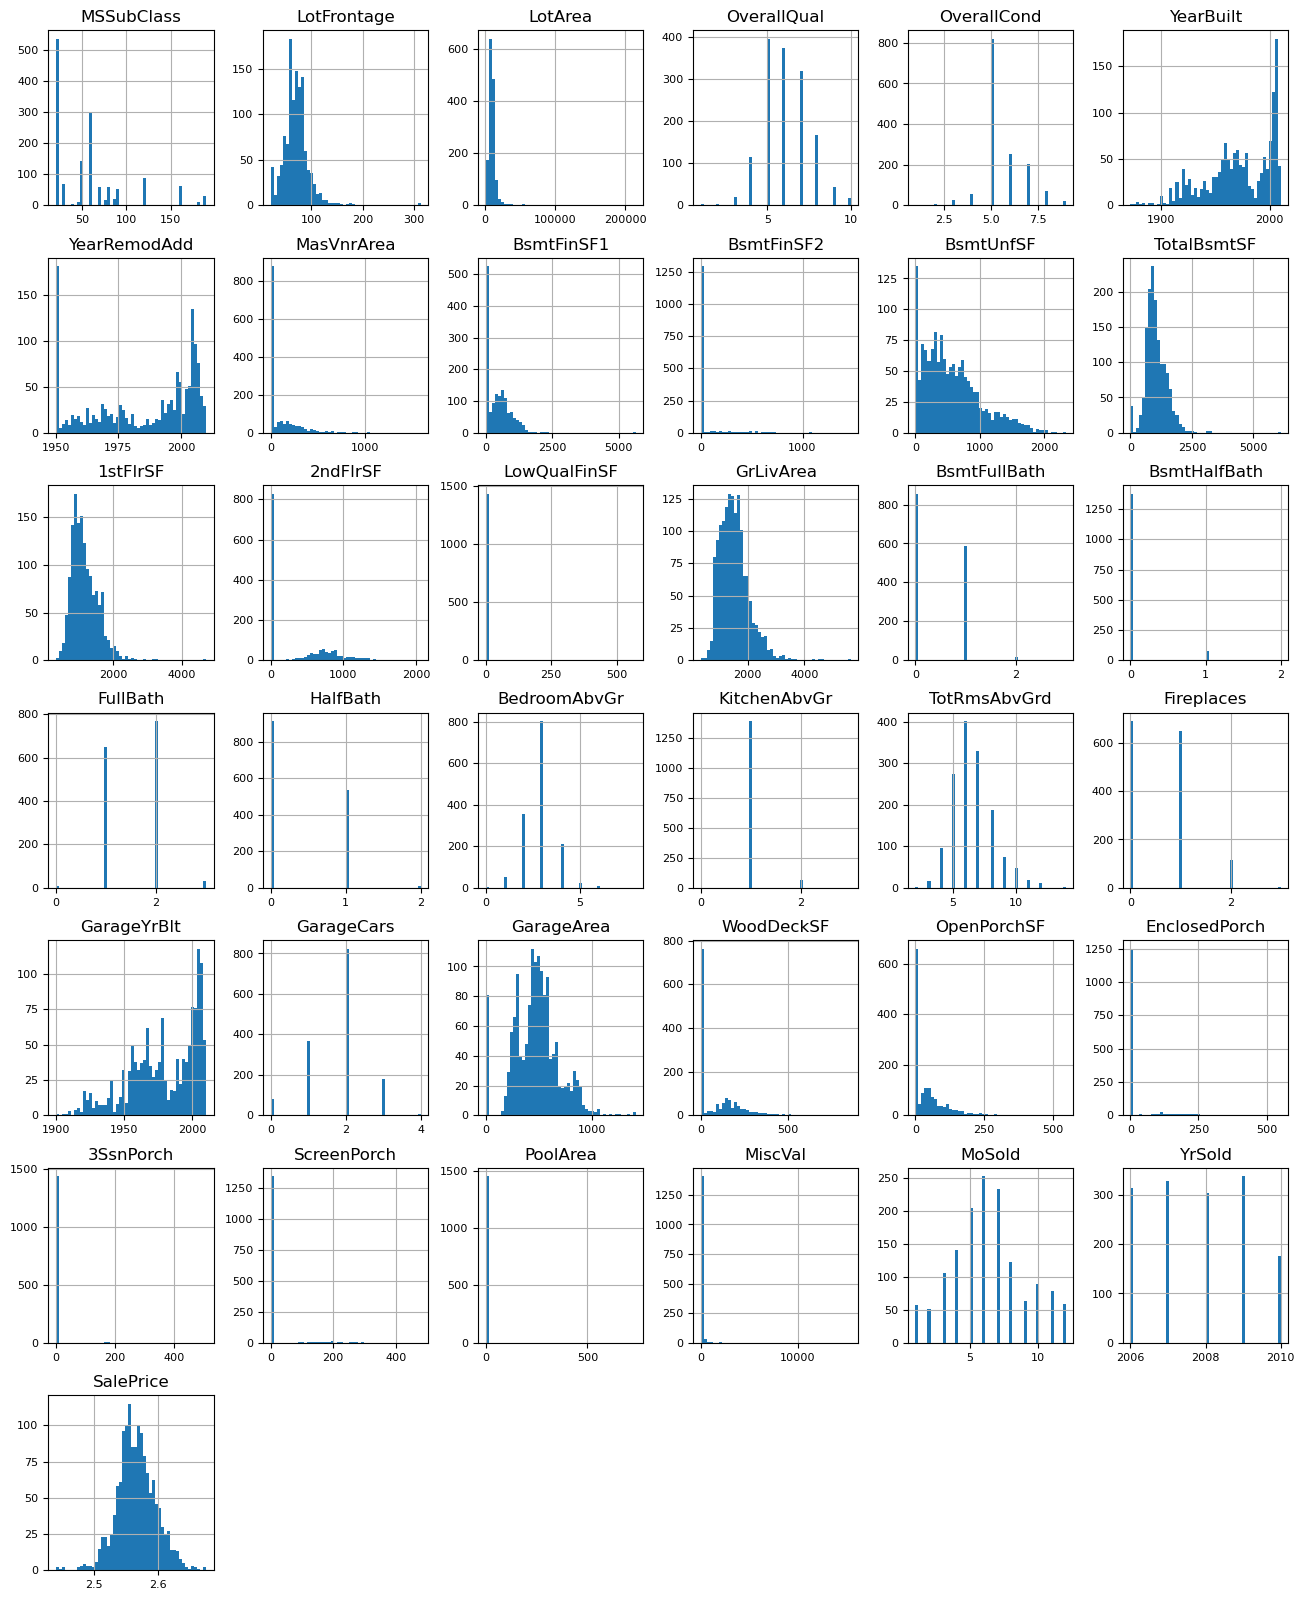

In [42]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

In [43]:
# correlation with SalePrice and create a new variable

df_num_corr = df_num.corr()['SalePrice'][:-1]
best_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print('There is {} strongly correlated values with SalePrice:\n{}'.format(len(best_list), best_list))





There is 11 strongly correlated values with SalePrice:
OverallQual     0.815005
GrLivArea       0.697001
GarageCars      0.680156
GarageArea      0.649601
TotalBsmtSF     0.609138
FullBath        0.593950
1stFlrSF        0.593533
YearBuilt       0.587947
YearRemodAdd    0.566811
GarageYrBlt     0.542620
TotRmsAbvGrd    0.532015
Name: SalePrice, dtype: float64


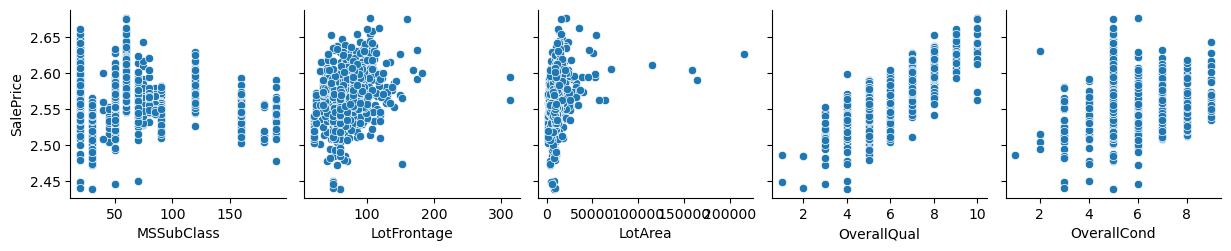

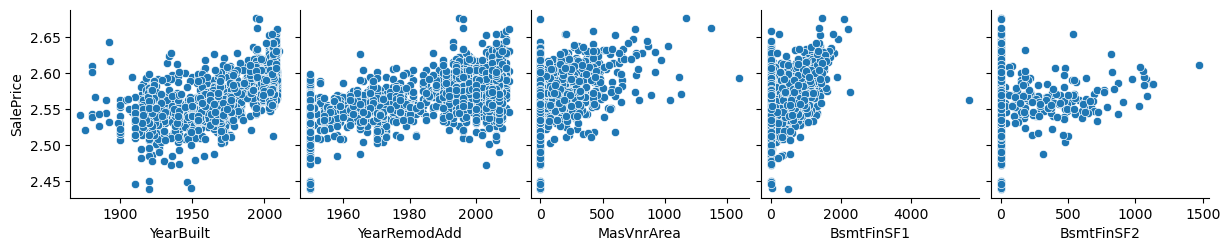

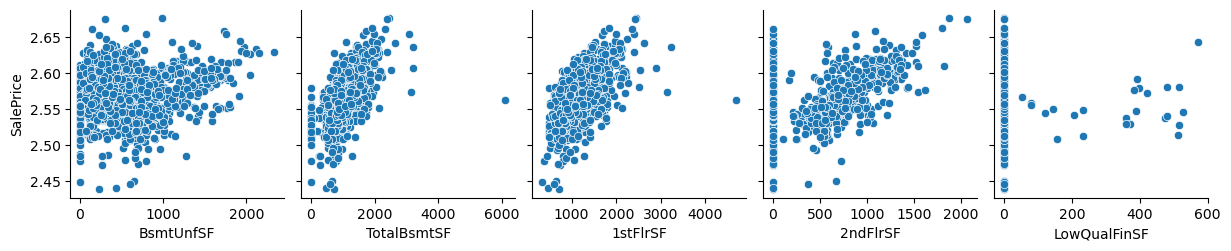

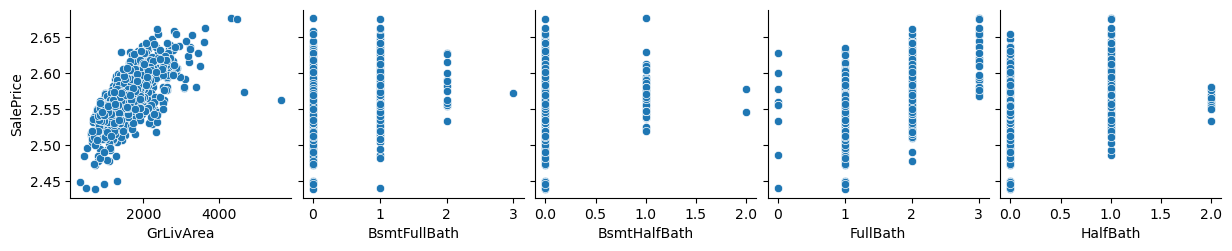

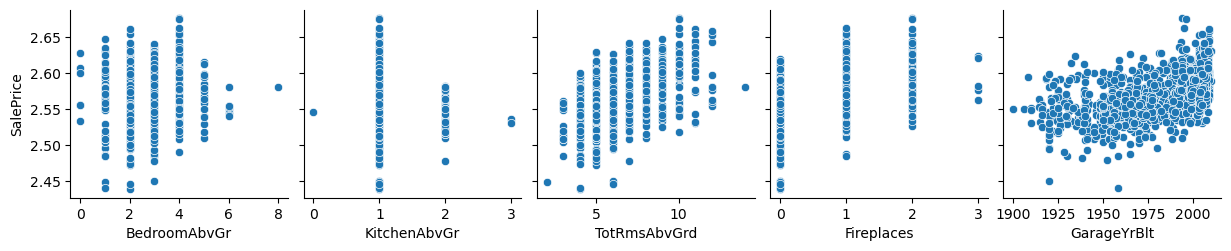

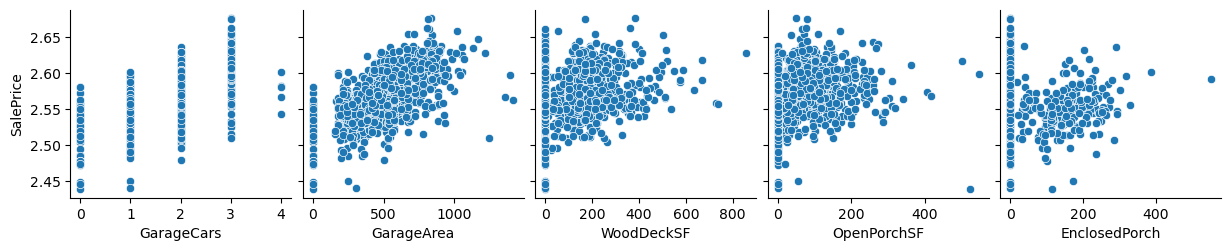

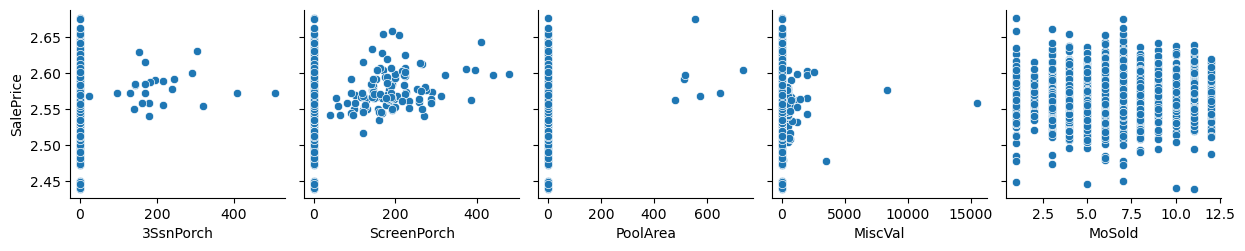

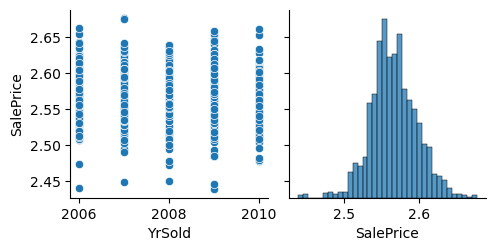

In [44]:
# Plot the numerical features and see which ones have very few or explainable outliers

for i in range(0, len(df_num.columns), 5):
    sn.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [ ]:
# We can clearly identify some relationships. Most of them seems to have a linear relationship with the SalePrice and if we look closely at the data we can see that a lot of data points are located on x = 0 which may indicate the absence of such feature in the house.

